In [95]:
import pandas as pd
import numpy as np

In [96]:
values_file = pd.read_csv("values.txt", delimiter = " ", header = None, names = ["-100", "-50", "0", "50", "100"])

In [97]:
values_file.index.name = "atm"
values_file.reset_index(inplace = True)
values_file

,atm,-100,-50,0,50,100
0,1,14.1450,18.2760,22.3940,26.5070,30.6180
1,10,1.3547,1.7938,2.2201,2.6410,3.0582
2,20,0.6416,0.8783,1.0998,1.3157,1.5275
3,30,0.4024,0.5733,0.7267,0.8748,1.0175
4,40,0.2816,0.4208,0.5404,0.6536,0.7627
5,50,0.2081,0.3296,0.4289,0.5214,0.6099
6,60,0.1582,0.2690,0.3547,0.4334,0.5082
7,70,0.1217,0.2259,0.3019,0.3706,0.4356
8,80,0.0936,0.1937,0.2624,0.3237,0.3814
9,90,0.0701,0.1687,0.2318,0.2872,0.3392


Those values are the data of molar volume at a spesified temperature and pressure values for a real substance.

In [98]:
real_values = pd.DataFrame()

In [102]:
def PVT(R, T, P):
  return (R*T)/P


R = 0.08206

minus_100 = PVT(R, 173, values_file["atm"])
minus_50 = PVT(R, 223, values_file["atm"])
equal_0 = PVT(R, 273, values_file["atm"])
plus_50 = PVT(R, 323, values_file["atm"])
plus_100 = PVT(R, 373, values_file["atm"])

real_values = pd.concat([minus_100, minus_50, equal_0, plus_50, plus_100], axis = 1)
real_values.columns = ["-100", "-50", "0", "50", "100"]
real_values

,-100,-50,0,50,100
0,14.196380,18.299380,22.402380,26.505380,30.608380
1,1.419638,1.829938,2.240238,2.650538,3.060838
2,0.709819,0.914969,1.120119,1.325269,1.530419
3,0.473213,0.609979,0.746746,0.883513,1.020279
4,0.354909,0.457484,0.560059,0.662635,0.765209
5,0.283928,0.365988,0.448048,0.530108,0.612168
6,0.236606,0.304990,0.373373,0.441756,0.510140
7,0.202805,0.261420,0.320034,0.378648,0.437263
8,0.177455,0.228742,0.280030,0.331317,0.382605
9,0.157738,0.203326,0.248915,0.294504,0.340093


To calculate fugacity, and fugacity coefficient we need to calculate ideal gas behaviour of this substance at these pressure and temperature values.

**kalın metin**
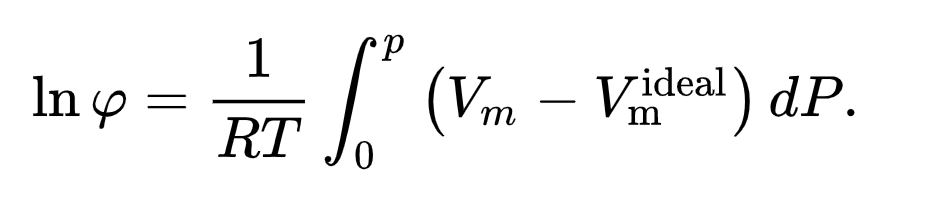

Where φ is f/P which is the fugacity coefficient and f is fugacity.

In [103]:
values_file_shifted = values_file.shift(1, axis = 0)
print(values_file_shifted)

real_values_shifted = real_values.shift(1, axis = 0)
print(real_values_shifted)

     atm     -100      -50        0       50      100
0    NaN      NaN      NaN      NaN      NaN      NaN
1    1.0  14.1450  18.2760  22.3940  26.5070  30.6180
2   10.0   1.3547   1.7938   2.2201   2.6410   3.0582
3   20.0   0.6416   0.8783   1.0998   1.3157   1.5275
4   30.0   0.4024   0.5733   0.7267   0.8748   1.0175
5   40.0   0.2816   0.4208   0.5404   0.6536   0.7627
6   50.0   0.2081   0.3296   0.4289   0.5214   0.6099
7   60.0   0.1582   0.2690   0.3547   0.4334   0.5082
8   70.0   0.1217   0.2259   0.3019   0.3706   0.4356
9   80.0   0.0936   0.1937   0.2624   0.3237   0.3814
10  90.0   0.0701   0.1687   0.2318   0.2872   0.3392
         -100        -50          0         50        100
0         NaN        NaN        NaN        NaN        NaN
1   14.196380  18.299380  22.402380  26.505380  30.608380
2    1.419638   1.829938   2.240238   2.650538   3.060838
3    0.709819   0.914969   1.120119   1.325269   1.530419
4    0.473213   0.609979   0.746746   0.883513   1.020279
5   

To use trapezoid rule which means we made shifting for both dataframes. https://en.wikipedia.org/wiki/Trapezoidal_rule

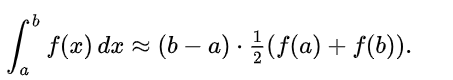

In [104]:
# Applying trapezoidal rule
values_file_average = (values_file.loc[:,"-100":"100"] + values_file_shifted.loc[:,"-100":"100"])/2
print(values_file_average)

real_values_average = (real_values.loc[:,"-100":"100"] + real_values_shifted.loc[:,"-100":"100"])/2
print(real_values_average)

       -100       -50         0        50       100
0       NaN       NaN       NaN       NaN       NaN
1   7.74985  10.03490  12.30705  14.57400  16.83810
2   0.99815   1.33605   1.65995   1.97835   2.29285
3   0.52200   0.72580   0.91325   1.09525   1.27250
4   0.34200   0.49705   0.63355   0.76420   0.89010
5   0.24485   0.37520   0.48465   0.58750   0.68630
6   0.18315   0.29930   0.39180   0.47740   0.55905
7   0.13995   0.24745   0.32830   0.40200   0.47190
8   0.10765   0.20980   0.28215   0.34715   0.40850
9   0.08185   0.18120   0.24710   0.30545   0.36030
10  0.06105   0.15905   0.21960   0.27270   0.32235
        -100        -50          0         50        100
0        NaN        NaN        NaN        NaN        NaN
1   7.808009  10.064659  12.321309  14.577959  16.834609
2   1.064728   1.372453   1.680178   1.987904   2.295628
3   0.591516   0.762474   0.933432   1.104391   1.275349
4   0.414061   0.533732   0.653403   0.773074   0.892744
5   0.319419   0.411736   0.504054

In [105]:
atm_series = values_file["atm"] - values_file_shifted["atm"]
atm_series

0      NaN
1      9.0
2     10.0
3     10.0
4     10.0
5     10.0
6     10.0
7     10.0
8     10.0
9     10.0
10    10.0
Name: atm, dtype: float64

In [109]:
func = lambda x: np.asarray(x) * np.asarray(atm_series)

integral_part_list = values_file_average.apply(func) - real_values_average.apply(func)

In [110]:
integral_list = (integral_part_list).sum().tolist()
integral_list

[-7.489668341269842,
 -3.4924750873015826,
 -1.819381833333329,
 -0.7910885793650508,
 -0.14644532539678634]

In [111]:
import math 
def function(P, T, sumValue):
  R = 0.08206 # L*atm/gmol/K
  return P*math.exp(sumValue/(R*T))

In [112]:
fugacityList = []

atmList = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for p in atmList:
  empty = []
  for j in range(len(integral_list)):
    T = (j*50 - 100) + 273
    empty.append(function(p, T, integral_list[j]))
  fugacityList.append(empty)



In [113]:
fugacityList

[[0.5900335217375825,
  0.8262547828470364,
  0.9219965711946402,
  0.9705946638109967,
  0.9952269427280629],
 [5.900335217375825,
  8.262547828470364,
  9.219965711946402,
  9.705946638109967,
  9.95226942728063],
 [11.80067043475165,
  16.525095656940728,
  18.439931423892805,
  19.411893276219935,
  19.90453885456126],
 [17.701005652127474,
  24.787643485411092,
  27.659897135839206,
  29.1178399143299,
  29.856808281841886],
 [23.6013408695033,
  33.050191313881456,
  36.87986284778561,
  38.82378655243987,
  39.80907770912252],
 [29.501676086879126,
  41.312739142351816,
  46.09982855973201,
  48.529733190549834,
  49.761347136403145],
 [35.40201130425495,
  49.575286970822184,
  55.31979427167841,
  58.2356798286598,
  59.71361656368377],
 [41.302346521630774,
  57.837834799292544,
  64.53975998362482,
  67.94162646676976,
  69.6658859909644],
 [47.2026817390066,
  66.10038262776291,
  73.75972569557122,
  77.64757310487974,
  79.61815541824504],
 [53.103016956382426,
  74.36293

In [114]:
fugacity_frame = pd.DataFrame(fugacityList, columns = ["-100", "-50", "0", "50", "100"], index = atmList)
fugacity_frame

,-100,-50,0,50,100
1,0.590034,0.826255,0.921997,0.970595,0.995227
10,5.900335,8.262548,9.219966,9.705947,9.952269
20,11.800670,16.525096,18.439931,19.411893,19.904539
30,17.701006,24.787643,27.659897,29.117840,29.856808
40,23.601341,33.050191,36.879863,38.823787,39.809078
50,29.501676,41.312739,46.099829,48.529733,49.761347
60,35.402011,49.575287,55.319794,58.235680,59.713617
70,41.302347,57.837835,64.539760,67.941626,69.665886
80,47.202682,66.100383,73.759726,77.647573,79.618155
90,53.103017,74.362930,82.979691,87.353520,89.570425


In [116]:
fugacity_frame.div(fugacity_frame.index.to_series(), axis=0)

,-100,-50,0,50,100
1,0.590034,0.826255,0.921997,0.970595,0.995227
10,0.590034,0.826255,0.921997,0.970595,0.995227
20,0.590034,0.826255,0.921997,0.970595,0.995227
30,0.590034,0.826255,0.921997,0.970595,0.995227
40,0.590034,0.826255,0.921997,0.970595,0.995227
50,0.590034,0.826255,0.921997,0.970595,0.995227
60,0.590034,0.826255,0.921997,0.970595,0.995227
70,0.590034,0.826255,0.921997,0.970595,0.995227
80,0.590034,0.826255,0.921997,0.970595,0.995227
90,0.590034,0.826255,0.921997,0.970595,0.995227
